In [1]:
import lmenv
lmenv.load('.lmenv')

Namespace(bin_path='/lightmetrica-v3/_build/bin', path='/lightmetrica-v3', scene_path='/lm3/scenes')

In [2]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import lightmetrica as lm
%load_ext lightmetrica_jupyter

In [3]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64


In [4]:
if not lm.Release:
    lm.debug.attach_to_debugger()
    lm.parallel.init('openmp', num_thread=1)

In [5]:
# Film for the rendered image
film = lm.load_film('film', 'bitmap', w=1920, h=1080)

# Pinhole camera
camera = lm.load_camera('camera', 'pinhole',
    position=[0,0,5],
    center=[0,0,0],
    up=[0,1,0],
    vfov=30,
    aspect=16/9)

# Load mesh with raw vertex data
mesh = lm.load_mesh('mesh', 'raw',
    ps=[-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1],
    ns=[0,0,1],
    ts=[0,0,1,0,1,1,0,1],
    fs={
        'p': [0,1,2,0,2,3],
        'n': [0,0,0,0,0,0],
        't': [0,1,2,0,2,3]
    })

# Material
material = lm.load_material('material', 'diffuse', Kd=[1,1,1])

[I|0.016] Loading asset [name='film']
[I|0.094] Loading asset [name='camera']
[I|0.095] Loading asset [name='mesh']
[I|0.095] Loading asset [name='material']


In [6]:
accel = lm.load_accel('accel', 'sahbvh')
scene = lm.load_scene('scene', 'default', accel=accel)

[I|0.102] Loading asset [name='accel']
[I|0.103] Loading asset [name='scene']


In [7]:
scene.add_primitive(camera=camera)
scene.add_primitive(mesh=mesh, material=material)

In [8]:
scene.build()

[I|0.115] Building acceleration structure [name='accel']
[I|0.115] .. Flattening scene
[I|0.115] .. Building


In [9]:
renderer = lm.load_renderer('renderer', 'raycast',
    scene=scene,
    output=film,
    bg_color=[0,0,0])
renderer.render()

[I|0.122] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

{'elapsed': 0.80884675}

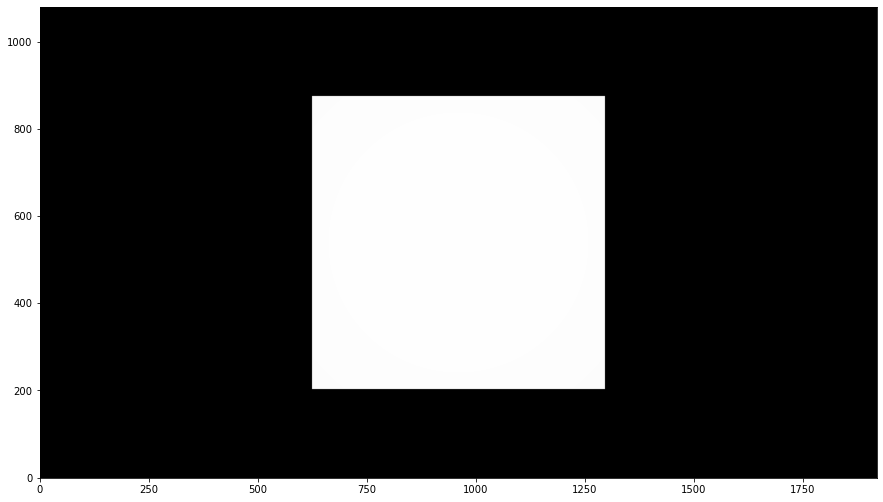

In [10]:
img = np.copy(film.buffer())
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(111)
ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
plt.show()